# Loading Data

In [93]:
import tensorflow as tf
import pandas as pd
import numpy as np
from kagglehub import dataset_download
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [94]:
path = dataset_download("andrewsundberg/college-basketball-dataset")
df = pd.read_csv(path + '\\cbb.csv')

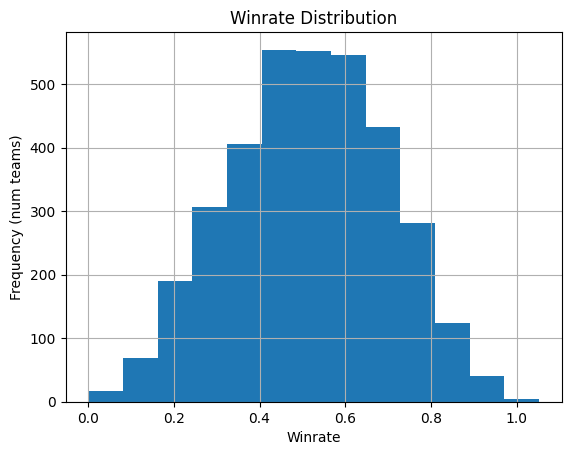

In [95]:
X = pd.get_dummies(df[['EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D']])
y = df['W'] / df['G']

y.hist(bins = 13)
plt.xlabel('Winrate')
plt.ylabel('Frequency (num teams)')
plt.title('Winrate Distribution')
plt.show()

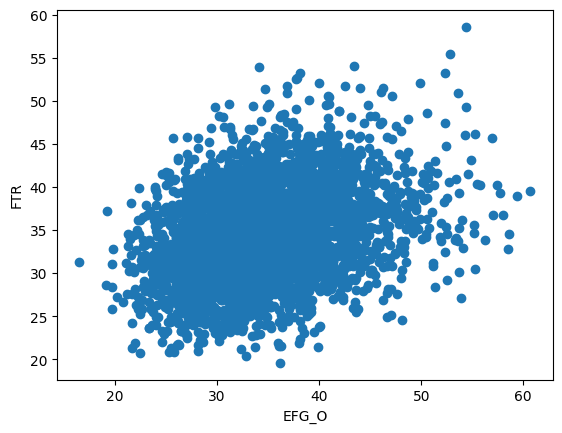

In [108]:
plt.scatter(df['FTRD'], df['FTR'])
plt.xlabel('EFG_O')
plt.ylabel('FTR')
plt.show()


# PCA (Principle Component Analysis)

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [71]:
k = 3
pca = PCA(n_components=k) 
principal_components = pca.fit_transform(data_scaled)

In [109]:
X_pca = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(k)])

In [73]:
print(pca.explained_variance_ratio_)
X_pca.head()

[0.47375738 0.30872749 0.21751513]


,PC1,PC2,PC3
0,1.465151,-1.001719,-2.084418
1,-0.134874,-1.929014,0.160652
2,-1.615180,-0.767218,0.373359
3,-0.582163,0.018117,0.130374
4,0.216437,-1.096883,0.697214


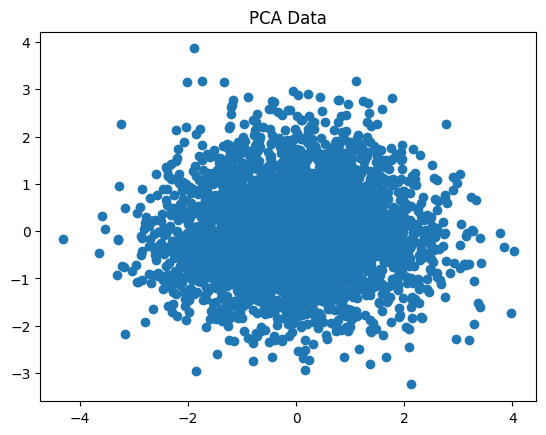

In [112]:
plt.scatter(X_pca['PC1'], X_pca['PC2'])
plt.title('PCA Data')
plt.show()


# The Models

In [17]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [118]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [63]:
X_train.head()

,PC1,PC2
593,-0.724035,-0.503230
2856,-1.960174,-0.713531
2207,-2.602225,-0.426727
2294,0.624116,-1.570861
1073,0.299578,0.210064


In [64]:
y_train.head()

593     0.296296
2856    0.676471
2207    0.656250
2294    0.750000
1073    0.517241
dtype: float64

In [119]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [120]:
model = Sequential()
model.add(Input(shape = (len(X_train.columns),)))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

In [121]:
model.fit(X_train_scaled, y_train_scaled, epochs=10, batch_size=32)


Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0277 - mae: 0.1339
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 - mae: 0.0877
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0066 - mae: 0.0635
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0055 - mae: 0.0585
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - mae: 0.0558
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - mae: 0.0558
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0050 - mae: 0.0562
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0050 - mae: 0.0556
Epoch 9/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - mae: 0.0559
Epoch 10/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - mae: 0.0563


In [122]:
Y_hat = model.predict(X_test_scaled)
mean_absolute_error(y_test_scaled, Y_hat)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


np.float64(0.05363807156981998)

In [25]:
model.save('control_model.keras')

In [26]:
del model

In [27]:
model = load_model('control_model.keras')